In [1]:
from pdVCF.pdVCF import VCF
import copy
import pandas as pd
import seaborn as sns

In [2]:
f = 'vcfs/vep.dbSNP.var.ug.both.yale.taad.filters.renamed.vcf'
vcf = VCF(f)

/home/david/projects/pdVCF/pdVCF/vcf2dataframe.py:262: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df = df.drop('UID', axis=1)


In [3]:
vcf_uk = VCF('vcfs/var.both.taadUkJan2017.filters.vcf')

/home/david/projects/pdVCF/pdVCF/vcf2dataframe.py:262: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df = df.drop('UID', axis=1)


In [4]:
def ab_stuff(vcf):
    AB_list = [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

    data = []

    for ab in AB_list:
        v = copy.deepcopy(vcf)

        ab_min = "AB > {}".format( max(0, ab-0.1))
        ab_max = "AB <= {}".format(ab)

        v.filter_vcf([ab_min, ab_max, 'DP >= 50', 'GQ >= 30', 'GT != 0/0', 'GT != ./.'], op='&', how='any')
        not_in_DB = len(v.vcf[v.vcf['ID'] == '.'])

        if v.vcf.shape[0] > 0:
            percent = not_in_DB / v.vcf.shape[0] * 100
            print("{} ({}/{}) of variants are not in dbSNP for AB between {}-{}".format(percent, not_in_DB, v.vcf.shape[0], max(0, round(ab-0.1, 1)), ab))
        else:
            print("0 variants after filtering for AB between {}-{}".format(ab_min, ab_max))
            pass

        data.append([ab, v.vcf.shape[0], not_in_DB, percent])




    df = pd.DataFrame(columns=['AB', 'No. Variants', 'Not in dbSNP', 'Percent'],
                      data=data)
    return df



In [5]:
df_yale = ab_stuff(vcf)


50.0 (14/28) of variants are not in dbSNP for AB between 0-0.01
43.75 (21/48) of variants are not in dbSNP for AB between 0-0.05
76.73545966228893 (818/1066) of variants are not in dbSNP for AB between 0-0.1
79.16295636687445 (1778/2246) of variants are not in dbSNP for AB between 0.1-0.2
55.73294629898403 (384/689) of variants are not in dbSNP for AB between 0.2-0.3
23.80191693290735 (149/626) of variants are not in dbSNP for AB between 0.3-0.4
15.681818181818183 (138/880) of variants are not in dbSNP for AB between 0.4-0.5
9.893048128342247 (74/748) of variants are not in dbSNP for AB between 0.5-0.6
9.653465346534654 (39/404) of variants are not in dbSNP for AB between 0.6-0.7
7.8817733990147785 (16/203) of variants are not in dbSNP for AB between 0.7-0.8
6.61764705882353 (9/136) of variants are not in dbSNP for AB between 0.8-0.9
5.426356589147287 (14/258) of variants are not in dbSNP for AB between 0.9-1


In [6]:
df_uk = ab_stuff(vcf_uk)

44.0251572327044 (70/159) of variants are not in dbSNP for AB between 0-0.01
43.79562043795621 (120/274) of variants are not in dbSNP for AB between 0-0.05
54.48154657293497 (310/569) of variants are not in dbSNP for AB between 0-0.1
69.14119359534206 (475/687) of variants are not in dbSNP for AB between 0.1-0.2
44.71299093655589 (148/331) of variants are not in dbSNP for AB between 0.2-0.3
17.794486215538846 (71/399) of variants are not in dbSNP for AB between 0.3-0.4
13.257575757575758 (70/528) of variants are not in dbSNP for AB between 0.4-0.5
9.615384615384617 (45/468) of variants are not in dbSNP for AB between 0.5-0.6
7.5098814229249005 (19/253) of variants are not in dbSNP for AB between 0.6-0.7
10.909090909090908 (12/110) of variants are not in dbSNP for AB between 0.7-0.8
16.94915254237288 (10/59) of variants are not in dbSNP for AB between 0.8-0.9
3.9800995024875623 (8/201) of variants are not in dbSNP for AB between 0.9-1


In [30]:
var = df_yale['No. Variants'] + df_uk['No. Variants']
no = df_yale['Not in dbSNP'] + df_uk['Not in dbSNP']
percent = no/var * 100

df = pd.concat([df_yale['AB'], var, no, percent.rename('Percent')], axis=1)
df

,AB,No. Variants,Not in dbSNP,Percent
0,0.01,187,84,44.919786
1,0.05,322,141,43.788820
2,0.10,1635,1128,68.990826
3,0.20,2933,2253,76.815547
4,0.30,1020,532,52.156863
5,0.40,1025,220,21.463415
6,0.50,1408,208,14.772727
7,0.60,1216,119,9.786184
8,0.70,657,58,8.828006
9,0.80,313,28,8.945687


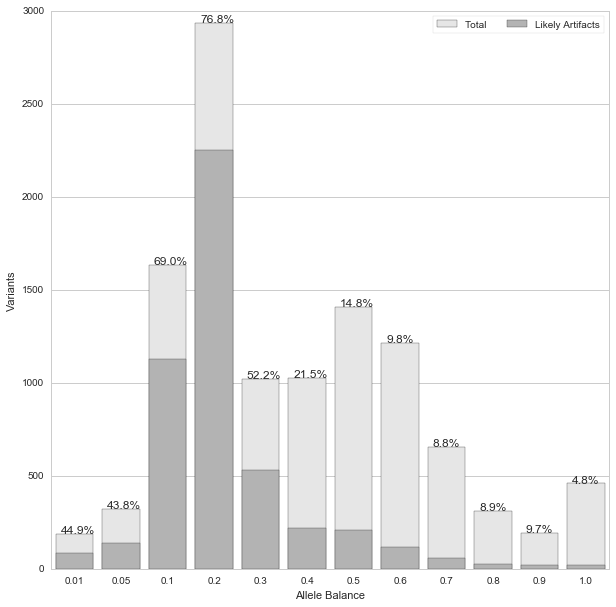

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 


sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))

# all vars
sns.set_color_codes("pastel")
sns.barplot(y="No. Variants", x="AB", data=df,
            label="Total", color="0.9")

# vars NOT in dbSNP
sns.set_color_codes("muted")
sns.barplot(y="Not in dbSNP", x="AB", data=df,
            label="Likely Artifacts", color="0.7")

ax.set(ylabel='Variants', xlabel='Allele Balance')
ax.legend(ncol=2, loc="upper right", frameon=True)


for x in range(len(df)):
    ax.text(x-0.3, ax.patches[x].get_height()+4, "{}%".format(round(df['Percent'].ix[x], 1)))

fig = ax.get_figure()
fig.savefig('AB Series Present in dbSNP.TEST.png')
